# KNN regression - Basic Principles

## Libraries

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

## Data

To illustrate how to perform KNN regression in [`scikit-learn`](https://scikit-learn.org/stable/) we will generate a synthetic data set.

The the data are generated based on the equation $y = w_o + w_1 x + \epsilon$, where $\epsilon$ is some random noise we add. 

We start be defining the values of $w_o$ and $w_1$.

In [2]:
wo = -1.0
w1 = +2.0

### Generate a data set

We generate a data set of $m$ points by adding Gaussian noise $\epsilon \sim N(0,\sigma)$ to the ideal model.<br>
Note: to simplify later the plotting of the trained model, we sort the random X values (try to run the same notebook without this sorting to understand why)

In [17]:
sigma = 0.25
m = 25

X = np.sort(np.random.rand(m))
y = wo + w1*X + np.random.normal(0, sigma, m)

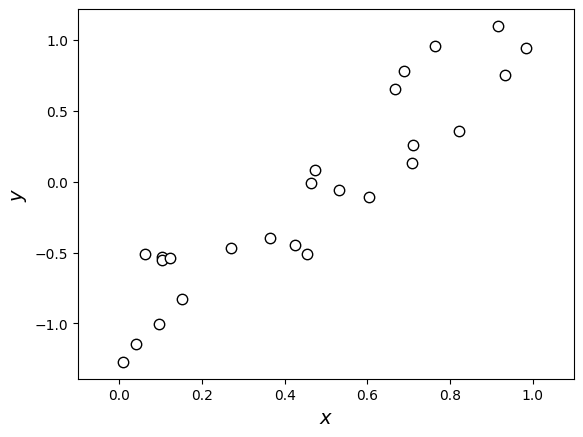

In [18]:
plt.plot(X, y, "k.", markersize=15, markerfacecolor='white')
plt.xlim([-0.1, 1.1])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

## Train KNN regressors with Scikit-Learn

We aim to train a k-nearest neighbor regressor.

This can be achieved with a [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) object:

In [19]:
reg = KNeighborsRegressor()

Before being able to train this model, we need to reshape our `X` values.

In [20]:
# Reshape X into an array as required by sciKit-learn (column vector with the features)
X_b = X.reshape((-1, 1))

The `y` values do not need any modification as they already have the correct shape.

We can proceed with the training of the model:

In [21]:
# Fit data using standard method from scikit-learn
reg.fit(X_b, y)

KNeighborsRegressor()

## Making predictions

Once the model is trained with the `fit()` method, it becomes possible to make predictions. For this we use the `predict()` method.

In [22]:
# predicting the value of y for x=0.5:
reg.predict([[0.5]])

array([-0.18737085])

In [23]:
# predicting the values of y for x=0.1, 0.2 and 0.3:
reg.predict([[0.1],
             [0.2],
             [0.3]])

array([-0.62689266, -0.58256179, -0.52953351])

A plot is always better than many numbers

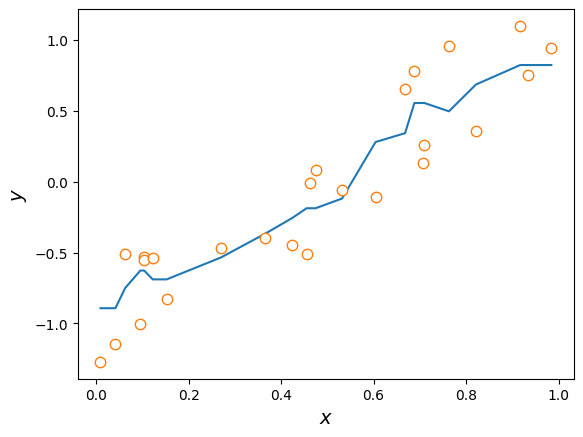

In [25]:
y_fit = reg.predict(X_b)

# Plotting data set and the fitted model
plt.plot(X, y_fit, "-")
plt.plot(X, y, ".", markersize=15, markerfacecolor='white')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

An alternative way to visualize the quality of the predictions is to plot the predicted values versus the actual values.<br>
This method is particularly useful in more complex data sets which have more than one feature.<br>
Usually one adds the line $y=x$ to help in reading the graph.

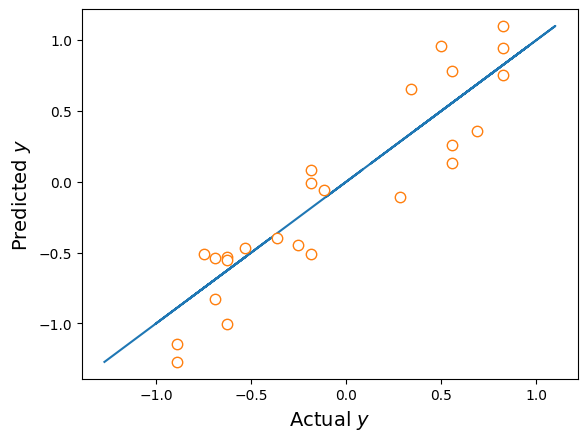

In [28]:
y_pred = reg.predict(X_b)

plt.plot(y, y, "-")
plt.plot(y_pred, y, ".", markersize=15, markerfacecolor='white')
plt.xlabel('Actual $y$', fontsize=14)
plt.ylabel('Predicted $y$', fontsize=14)
plt.show()

## Errors of predictions

In machine learning, the concept of error needs to be carefully analyzed and defined. We will do this later in the course. 
In this first example we are going to compute the errors you will know as 'residuals' from your undergraduate classes in numerical methods. 

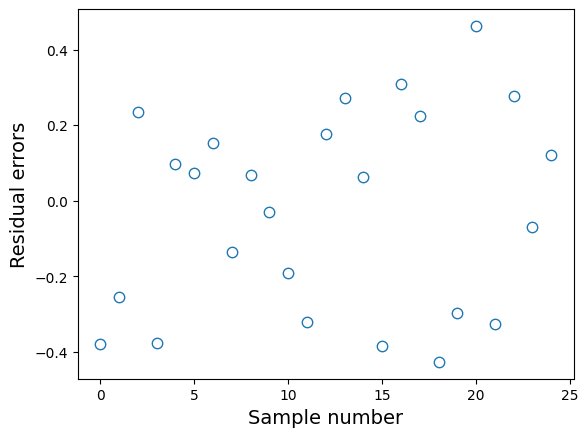

In [31]:
# residual errors
err = y - reg.predict(X_b)

# Plot
plt.plot(err, ".", markersize=15, markerfacecolor='white')
plt.xlabel('Sample number', fontsize=14)
plt.ylabel('Residual errors', fontsize=14)
plt.show()

Statistical plots, such as histograms and box-plots are often used too.

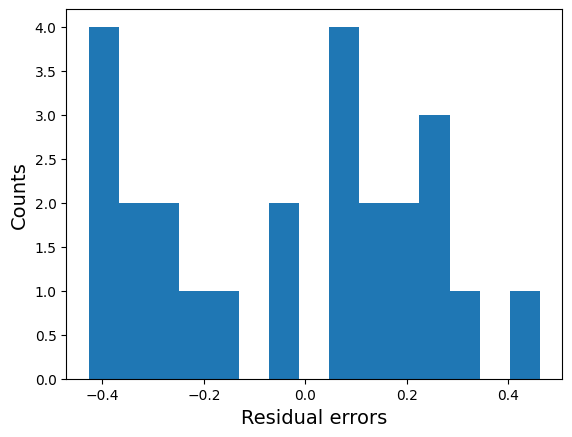

In [32]:
plt.hist(err, bins=15)
plt.xlabel('Residual errors', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

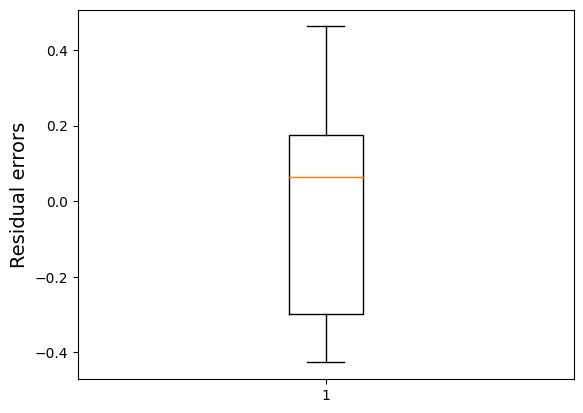

In [33]:
plt.boxplot(err)
plt.ylabel('Residual errors', fontsize=14)
plt.show()